# DEVS SIMULATION MODEL TO EVALUATE PERFORMANCE OF D2D/NB-IOT COMMUNICATIONS 

Trabajo Práctico 1. Modelado y Simulación de Eventos Discretos. 2C - 2021

Integrantes del grupo:
* Mariano Segura.
* Rodolfo L. Sumoza Matos.

# Outline

* [Introducción](#intro)
  * [What is IoT?](#iot)
  * [What is D2D?](#d2d)
  * [What is NB-IoT?](#nb-iot)
  * [D2D-NB-IoT](#d2d-nb-iot)
  * [Objective](#objective)
  * [Performance parameters](#parameters)
      * [Distances between devices](#distance)
      * [Obstacle density](#obstacle)
      * [Transmission’s scheduling](#scheduling)
      * [Interfering device density](#interference)
  * [Model](#model)
  * [Specification](#specification)
  * [Experimentation](#Experimentation)

<a id='iot'></a>
# Wha is IoT?


<center><img src="img/iot.jpg" width="600"></center>

# Internet of Things
   * Grouping and interconnection of devices and objects through a network.
   * All of them could be visible and interact.
   * They could be sensors and mechanical devices and everyday objects such as the refrigerator, footwear or clothing.
   * Anything that can be imagined could be connected to the internet and interact without the need for human intervention.
   * Machine-to-Machine (M2M) or Device-to-Device (D2D) interaction.

<a id='d2d'></a>
# What is D2D?

<center><img src="img/d2d.png" width="600"></center>

# Device to Device communications
In classical network all communications must go through a base station even when two devices are in range of stablishing a connection.
Device to Device communication is defined as a direct communication between two users without traversing
the Base Station improving the spectral efficency, throughput,
energy efficiency, delay, and fairness by offloading traffic from the core network.
We focus on Inband implementations where lincensed cellular frequencies are used thus interference between devices and cellular links must be modeled.

<a id='nb-iot'></a>
# What is NB-IoT?

<center><img src="img/nbiot.png" width="600"></center>

# Narrow Band in Internet of Things
   Narrow Band networks use a small bandwidth in a known cellular spectrum to transmit data at high fault resistance and lower power consumption.
   * A standards-based low power wide area (LPWA) technology.
   * Cellular technologie: 5G.
   * Enable a wide range of new IoT devices and services.
   * Significantly improves the power consumption of user devices, system capacity and spectrum efficiency, especially in deep coverage.
   * Battery life of more than 10 years.
   * It can co-exist with 2G, 3G, and 4G mobile networks.
   
Although one of the main characteristics of this technology is wide coverage, it's starts facing issues under high device density areas and long distance communications.

<a id='d2d-nb-iot'></a>
# D2D in NB-IoT

<center><img src="img/antenas_relays2.png" width="600"></center>

# Device to Device in Narrow Band Internet of Things
Given the connectivity issues NB-IoT presents, D2D solutions were suggested for achieving coverage between far devices more over improving QoS.
The D2D protocol establish a 2 hop route between devices out of coverage of the base station (DUE) and the base station(BS) by means of selecting a second device connected to the BS (UE) in range of the DUE as relay.   
   * D2D comunication to not-coveraged devices.
   * NB-IoT full communication.
   * Coveraged area extended.

   

<a id='objective'></a>
# Objective

We would like to evaluate the QoS of D2D NB-IoT communications given a relay selection policy under physical characteristics of the network

<a id='parameters'></a>
# Performance Parameters

<a id='distance'></a>
## Distance between devices

<center><img src="img/distances.png" width="700"></center>

* Rayleigh Model is the l parameter
* Long distance “ą low quality communications".

<a id='obstacle'></a>
## Obstacle Density

<center><img src="img/urban_suburban.png" width="600"></center>

* In the Rayleigh Model is the α parameter.
* Urban scenario: High density of obstacles.
* Suburban scenario: Low density of obstacles.

<a id='scheduling'></a>
## Transmission’s scheduling

<center><img src="img/scheduling.png" width="600"></center>

* NB-IoT parameters.
* Repetitions: Several messages in the transmission.
* Retransmissions: Several transmission of the same messages.

<a id='interference'></a>
## Interfering device density

<center><img src="img/interference.png" width="600"></center>

<a id='model'></a>
# Model

## Chanels
We are studying device-to-device (D2D) communications in an NB-IoT context, and we define the fading Rayleigh as channel model whose signal-to-noise ratio with interference (SINR) is used to calculate the packet delivery ratio (PDR), to both D2D communication and for device-to-base station communication. PDR represents a probability of successful packet delivery, and multiple devices within the base station's coverage area are used to forward packets from out-of-area devices.

* __Relays__ : 
    * Duty cycle windows of fixed size segmented by intervals of maximum transmission time in which the device is in state D2D or cellular. 
    * Using a MonteCarlo process, calculate if a transmission is sucessful given its PDR (including D2D and D2BS comunication).
    * Consider information about the obstacles and interfirence devices density relative to each relay and the BS.
    * The interference is Random generated as vectors of the other devices to each relay and to the BS.
* __DUE__ 
    * Packets are transmitted between intervals following a exponential distribution (Poisson proccess). 
* __BS__
    * Recieves the packets to generates data necessary to calculate Expected Delivery Ratio (EDR) as quality measure.
    * Records packet Hits and Miss 


### Relay Scheduling
The relay selection is based considering comibined PDR in D2D and D2BS communication. Whenever a transmission to BS fails the scheduler is notified and chooses the next relay to transmit the message up to a maximum of N retransmissions.

* Controller
    * Message FIFO Queue for DUE arrivals and relays retransmission. 
    * Relay Selector using PDR weigthed score dinamycaly updated on relay delivery failure.
    * On message retrieval from the queue the N retransmission schema is timed based on each relay duty cycle window. For each time interval T1,...,TN the highest priority relay whose D2D cycle is active is scheduled for potential retransmission.
    * On message successful delivery or message loss, asks for updates in relay's duty cycle window and PDR


<img src="img/scheduler.png" width="600">

<a id='devs'></a>
# Coupled Model 

* The top model is composed by:
    * Atomic DUE 
    * Atomic Base Station 
    * Relay-hop coupled model where relay policy logic is implemented.
        1. K atomic relays (for this assignment we limit the number at 4 and we will improve upon it the second part of the course)
        2. Controller coupled model
            * Atomic message FIFO Queue
            * Atomic Relay Selector

<a id='specification'></a>
# DEVS Model Specification 

## Coupled Models

### NB-IOT TOP MODEL

    Coupled Model <X, Y, D, {Md]d D}, EIC, EOC, IC, select >

    IPorts = {packet_port, success_port, failed_port}
    OPorts = {out, transmission_port, trow, hop}

    X = {(packet_port,<N,N_0>), (succes_port,<N_0,N_0,PDR ∈ R/0<=PDR<=1), (failed_port,<N_0,N_0,PDR ∈ R/0<=PDR<=1)};
    
    Y = {(out,  < N_0 >), (transmission_port, <N,N_0>), (trow_port, <N,N_0,PDR ∈ R/0<=PDR<=1>),  (hop, <N,N_0,PDR ∈ R/0<=PDR<=1>)  };
    Model
    D = {DUE, Relay Hop System, Stats};
    
    Md = {  M_DUE, M_Relay_Hop_System, M_Stats };
    
    EIC = { ∅ };
    
    EOC = { ( <Stats, out>, <Self, out> ) }; 
    
    IC  = { ( <DUE, packet_port>, <Relay Hop System, transmission_port>), (<Relay Hop System,trow>, <Stats, failed_port>), (<Relay Hop System, hop>, <Stats, success_port>)    }; 
    
    select = {DUE, Relay Hop System, Stats}
    

    

    
    



<img src="img/top.png" width="50%"></left>

### Relay Hop System

    Coupled Model <X, Y, D, {Md]d D}, EIC, EOC, IC, select>

    IPorts = {packet_port, transmission_port, relayIn, ProtocolIn, UpdateIn }
    OPorts = {relay1Out, relay2Out, relay3Out, relay4Out, ProtocolOut, UpdateOut, retransmit, hop, trow}

    Y = {(relayiOut,<N_0>), (update,<{0,1},id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, r.id = id > ), 
    (ProtocolOut,<windowd ∈ {0,1}^4, type ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, PDR(i) ∈ R/0<=PDR(i)<=1 > ),
    (retransmit, < t ∈ N/ t <= controller.max_retransmission(), PDR ∈ R/0<=PDR<=1 , outcome ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4} > ),
    (hop, < t ∈ N/ t <= controller.max_retransmission(), PDR ∈ R/0<=PDR<=1 , id ∈ N/ ∃ r ∈ {Relay1,..,Relay4} > ), 
    (trow, < t ∈ N/ t <= controller.max_retransmission(), PDR ∈ R/0<=PDR<=1 >, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}),
    (UpdateOut, <0> )
    };
    
    X = {(ProtocolIn , <windowd ∈ {0,1}^4, type ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, PDR(i) ∈ R/0<=PDR(i)<=1 > ),
        (relayIn, < t ∈ N/ t <= controller.max_retransmission(), PDR(i) ∈ R/0<=PDR(i)<=1, {0,1},id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, >), 
        (packet_port, <N, N_0>),
        (transmission_port, <N, N_0>)
        (UpdateIn, <0> )
        };
    
    D = {Controller, Relay1, Relay2, Relay3, Relay4};
    
    Md = {  M_Controller, M_Relay};
    
    EIC = { (<Self,transmission_port> , <Controller, packet_port> ) };
    
    EOC = { ( <Relayi, hop>, <Self, hop> ), ( <Controller, trow>, <Self, trow> )}; 
    
    IC  = {  <Controller, RelayiOut>, <Relayi, packet_port> ), ( <Relayi, ProtocolOut>, <Controller,ProtocolIn> ), ( <Relayi, retransmit>, <Controller,relayIn> ), 
          ( <Controler, UpdateOut>, <Relayi,UpdateIn> )    }; 
    
    select = {Relay1,Relay2,Relay3,Relay4 Controller}

<img src="img/RelayHopSystem.png" width="50%"></left>

### Controller

    Coupled Model <X, Y, D, {Md]d D}, EIC, EOC, IC, select>

    IPorts = {in, done, Packet, relayIn, ProtocolIn}
    OPorts = {relay1Out, relay2Out, relay3Out, relay4Out, UpdateOut, trow, ack}

    Y = {(relayiOut,<N_0>), 
        (UpdateOut, <0> )
        (trow, <t ∈ N/ t <= controller.max_retransmission(),id ∈ N/ ∃ r ∈ {Relay1,..,Relay4},PDR ∈ R/0<=PDR<=1 >),
        (ack, <0>)};
        (out, <N, N_0>)};
    
    X = {(in ,  <N, N_0> ),
        (done, <0>), 
        (ProtocolIn , <windowd ∈ {0,1}^4, type ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, PDR(i) ∈ R/0<=PDR(i)<=1 > ),  
        (relayIn, <t ∈ N/ t <= controller.max_retransmission(),{0,1},id ∈ N/ ∃ r ∈ {Relay1,..,Relay4},PDR(i) ∈ R/0<=PDR(i)<=1 >), 
        (PacketIn, <N, N_0>)};
    
    D = {Fifo, Scheduler};
    
    Md = {  M_Queue, M_Scheduler};
    
    EIC = { (<Self,Packet> , <Fifo, in> ), ( <self, ProtocolIn>, <Scheduler, ProtocolIn> ), ( <self, relayIn>, <Controller,relayIn> ) };
    
    EOC = { ( <Scheduler, trow>, <Self, trow> ), ( <Scheduler, relayiOut>, <Self, relayiOut> ), ( <self, UpdateOut>, <Scheduler,UpdateOut> )}; 
    
    IC  = {  <Scheduler, ack>, <Fifo, donde> ), (<Fifo, out>, <Scheduler, Packet>), }; 
    
    select = {FiFo Scheduler}

<img src="img/Controller.png" width="50%"></left>

### Relay

        
    Coupled Model <X, Y, D, {Md]d D}, EIC, EOC, IC, select>

    IPorts = {Packet, UpdateIn}
    OPorts = {hop, retransmit, ProtocolOut}

    Y = {(ProtocolOut,<windowd ∈ {0,1}^4, type ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, PDR(i) ∈ R/0<=PDR(i)<=1 > ),
        (retransmit, < t ∈ N/ t <= controller.max_retransmission(), PDR ∈ R/0<=PDR<=1 , outcome ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4} > ),
        (hop, < t ∈ N/ t <= controller.max_retransmission(), PDR ∈ R/0<=PDR<=1 , id ∈ N/ ∃ r ∈ {Relay1,..,Relay4} > )
        };
    
    X = {(Packet, <N, N_0>),
        (UpdateIn, <0> )
        }; 
        
    D = {Transmitter, CycleScheduler};
    
    Md = {  M_Transmitter, M_CycleScheduler};
    
    EIC = { (<Self,Packet> , <Transmitter, Packet> ), ( <self, UpdateIn>, <CycleScheduler, UpdateIn> ), ( <self, UpdateIn>, <Transmiter, UpdateIn> )};
    
    EOC = { ( <CycleScheduler, ProtocolOut>, <Self, ProtocolOut> ), ( <Transmitter, ProtocolOut>, <Self, ProtocolOut> ), ( <Transmitter, hop>, <Self,hop> ),  (<Transmitter, retransmit>, <Self,retransmit> )}; 
    
    IC  = { ∅ }; 
    
    select = {CycleScheduler, Transmitter}

<img src="img/Relay.png" width="50%"></left>

## Atomic Models

### DUE
    atomic = <X, Y, S, δ int , δ ext , λ, ta>
    
    X = { ∅ };
    
    Y = {(Out, <N,N_0>)];
    S = {lambda ∈ R, message_id ∈ N};
 
    δ ext : (S,e,X)  = S;
    δ int : (S) = message_id++;
    λ: (S) = sendOutput(time, Out, message_id)
    ta:(S) = x ~ exp(lambda)

### Transmitter
    atomic = <X, Y, S, δ int , δ ext , λ, ta>
    
    X = {(Packet, <N, N_0>),
        (UpdateIn, <0> )
        };
    
    Y = {(ProtocolOut,<windowd ∈ {0,1}^4, type ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, PDR(i) ∈ R/0<=PDR(i)<=1 > ),
        (retransmit, < t ∈ N/ t <= controller.max_retransmission(), PDR ∈ R/0<=PDR<=1 , outcome ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4} > ),
        (hop, < t ∈ N/ t <= controller.max_retransmission(), PDR ∈ R/0<=PDR<=1 , id ∈ N/ ∃ r ∈ {Relay1,..,Relay4} > )
        };

    S = {send_info ∈ Bool, pdr ∈ R/0<=pdr<=1,  mu ∈ R, H_x_b ∈ R, distance_to_bs ∈ N, devices_maximum_distance ∈ N, packet_size ∈ N, packet_split ∈ N, noise ∈ R, 
        alpha ∈ R, Px ∈ R, interferance ∈ R, device_density ∈ N, #retransmissions ∈ N};
         
    δ ext : (S,e,X)  = if ( X == UpdateIn): 
                            send_info = true
                            total ~ Binomial(device_density)
                            r ~ Uniform(1, device_maximum_distance)
                            h_y_b ~ exp(mu)
                            interference = getInterferance(h_y_b, r, alpha, total)
                            pdr = getPDR(H_x_b, interference, alpha, Px, distance_to_bs)
                            ta(0)
                            
    δ int : (S) = send_info = false
                  passivate()
    λ: (S) = relay_id = Port.Influence.modelId()
             if(send_info):
                sendOutput( msg.time(), ProtocolOut,  <0,0,0,0,1,relayid,pdr>)
             else:
                choice ~Uniform_Real(0.0, 1.0)
                if(choice <= pdr):
                    sendOutput( msg.time(), hop, <pdr,#retransmission,relay_id>)
                    sendOutput( msg.time(), retransmit, <pdr, #retransmission,0relay_d>)
                else
                    sendOutput( msg.time(), retransmit, <pdr,#retransmission,1,relay_id>);


### CycleScheduler

    atomic = <X, Y, S, δ int , δ ext , λ, ta>

    X = {(UpdateIn, <0> )};

    Y = {(ProtocolOut,<windowd ∈ {0,1}^4, type ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, PDR(i) ∈ R/0<=PDR(i)<=1 > ) };

    S = {send_info ∈ Bool, cycle_rate ∈ R/0<=cycle_rate<=1, duty_window ∈ {0,1}^4};

    δ ext : (S,e,X) = send_info = true

    δ int : (S) = send_info = false    
                  for(i =0; i<4;i++):
                    round ~ Uniform_Real(0.0, 1.0)
                    if(round <= cycle_rate):
                        duty_window[i] = 1;
                    else
                        duty_window[i] = 0;

    λ: (S) = if(send_info):
                 relay_id = ProtocolOut.Influence.modelId
                 sendOutput( msg.time(), ProtocolOut, <duty_window, 0, relay_id, 0.0>);
    ta:(S) = 1 segundo

### Scheduler

    atomic = <X, Y, S, δ int , δ ext , λ, ta>

    X = {(ProtocolIn , <window ∈ {0,1}^4, type ∈ {0,1}, id ∈ N/ ∃ r ∈ {Relay1,..,Relay4}, PDR(i) ∈ R/0<=PDR(i)<=1 > ),  
        (relayIn, <t ∈ N/ t <= controller.max_retransmission(),outcome ∈ {0,1},id ∈ N/ ∃ r ∈ {Relay1,..,Relay4},PDR(i) ∈ R/0<=PDR(i)<=1 >), 
        (PacketIn, <N, N_0>)};
        
    Y = {(relay1Out,<N_0>),
        (relay2Out,<N_0>),
        (relay3Out,<N_0>),
        (relay4Out,<N_0>),
        (UpdateOut, <0> ),
        (trow, <t ∈ N/ t <= controller.max_retransmission()+1,id ∈ N/ ∃ r ∈ {Relay1,..,Relay4},PDR ∈ R/0<=PDR<=1 >),
        (ack, <0>)};
         
    S = {lambda ∈ R
        relay_pdr / ∀Key ∈ relay_pdr.keys(), Key ∈ relay_ids Y 0<= relay_pdr[key] <=1 , 
        duty_cycle_windows / ∀Key ∈ duty_cycle_windows.keys(), Key ∈ relay_ids Y duty_cycle_windows[Key] ∈ {0,1}^4,
        priority / id ∈ priority -> id ∈ relay_ids
        maxRetransmission ∈ N
        relay_identifier ∈ N_0
        acknowledge ∈ Bool
        wait_for_info ∈ Bool
        updates ∈ N_0
        #retransmission ∈ N_0
        };

    δ ext : (S,e,X) = if(X == Packet):
                          #retransmission  = msg[1]
                          acknowledge = false
                          wait_for_info = true
                          updates = 0
                          ta(0)
                      else if( X == ProtocolIn):
                          type = msg.type
                          relay_identifier = msg.id
                          if(type == 0):
                              duty_cycle_window[relay_identifier] = msg.window
                          else:
                              pdr = msg.pdr
                              relay_pdr[relay_identifier] = pdr
                          updates++
                          if(updates == 8):
                              choose_priority(relay_pdr, duty_cycle_window , priority)
                              wait_for_info = false;
                              ta(0)
                      else:
                          relay_identifier = msg.id
                          outcome = msg.outcome
                          #retransmission = msg.t
                          if(outcome == 0):
                              acknowledge = true;
                          else:
                              acknowledge = false;
                          ta(0)

    δ int : (S) = passivate();

    λ: (S) = if(wait_for_info):
                if(updates == 0):
                    sendOutput(msg.time(), ProtocolOut, 0 )
             else:
                outRelay =  priority[#retransmission];
                while(outRelay == 0 &&  priority.size() > #retransmission):
                     #retransmission++
                     outRelay =priority[#retransmission];
                else if(maxRetransmission > #retransmission && outRelay != 0)

                     if(!this->acknowledge):
                        #retransmission ++
                        sendOutput(msg.time(), Relay*outRelay*Out , #retransmission)
                    else:
                        sendOutput(msg.time(), ack, Real(0) )
            else:
                sendOutput(msg.time(), ack, 0 );
                sendOutput(msg.time(),trow, <relay_pdr[message_identifier], #retransmission,  relay_identifier>);
    ta:(S) = 0

### Stats (Base Station)

    atomic = <X, Y, S, δ int , δ ext , λ, ta>
    

    X = {(succes_port,<N_0,N_0,PDR ∈ R/0<=PDR<=1), (failed_port,<N_0,N_0,PDR ∈ R/0<=PDR<=1)};

    Y = {(out, < N_0 >) };


    S = {type ∈ Bool, failed ∈ N_0, delivered ∈ N_0};

    δ ext : (S,e,X) =  if(X == fail):
                           failed = msg.time().asSecs()
                           type = false
                       else:
                           delivered = msg.time().asSecs()
                           type = true
                       ta(0)

    δ int : (S) = passivate()

    λ: (S) = if(type):
                sendOutput( msg.time(), out, delivered );
             else:
                sendOutput( msg.time(), out, failed );

    ta:(S) = Inf

In [1]:
from pathlib import Path

SED_HOME = Path.home().joinpath('SED')

#Directorio base donde está instalado el siumulador
CDPP_DIR = SED_HOME.joinpath('CDPP_ExtendedStates-codename-Santi')
INFORME_DIR = SED_HOME.joinpath('NB-IOT')
CDPP_SRC = CDPP_DIR.joinpath('src')
CDPP_EXAMPLES = CDPP_DIR.joinpath('examples')
CDPP_SCRIPTS = CDPP_DIR.joinpath('scripts')
BASE_BIN = CDPP_SRC.joinpath('bin')
CDPP_ATOMICS = CDPP_SRC.joinpath('cd++/atomics')

In [2]:
%%bash -s "$INFORME_DIR"

cd $1/D2D

make clean

make

g++ -c -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/parser -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/parser/cdlang -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/parser/cdlang/obj -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/parser/obj -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/cell -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/cell/obj -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/val -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/val/obj -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/msg -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/msg/obj -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/warped -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/warped/common -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/warped/common/obj -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/obj -I../../CDPP_ExtendedStates-codename-Santi/src/cd++/mi

In file included from register.cpp:5:
transmitter.h:12: warning: "ATOMIC_MODEL_NAME" redefined
 #define ATOMIC_MODEL_NAME "transmitter" // cambiar nombre
 
In file included from register.cpp:4:
due.h:11: note: this is the location of the previous definition
 #define ATOMIC_MODEL_NAME "due" // cambiar nombre
 
In file included from register.cpp:6:
cycleScheduler.h:14: warning: "ATOMIC_MODEL_NAME" redefined
 #define ATOMIC_MODEL_NAME "cycleScheduler" // cambiar nombre
 
In file included from register.cpp:5:
transmitter.h:12: note: this is the location of the previous definition
 #define ATOMIC_MODEL_NAME "transmitter" // cambiar nombre
 
In file included from register.cpp:7:
scheduler.h:17: warning: "ATOMIC_MODEL_NAME" redefined
 #define ATOMIC_MODEL_NAME "scheduler" // cambiar nombre
 
In file included from register.cpp:6:
cycleScheduler.h:14: note: this is the location of the previous definition
 #define ATOMIC_MODEL_NAME "cycleScheduler" // cambiar nombre
 
In file included from regis

<a id='Experimentation'></a>
# Experimentation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Population Density 

    We will focus on how wireless devices of 13 DBm Signal-to-Noise-plus-Interference Ratio is affected by enviroments of variable obstacle and device density, measuring the packet hit/miss ratio (pdr) 

### Urban Areas with low device interference 

In [4]:
%%bash -s "$INFORME_DIR"

cd $1/D2D

bin/cd++ -m model/D2D_urban_1.ma \
         -o D2D_urban_1.out \
         -l D2D_urban_1.log \
         -t 00:05:00:00 \
        > debug.txt 

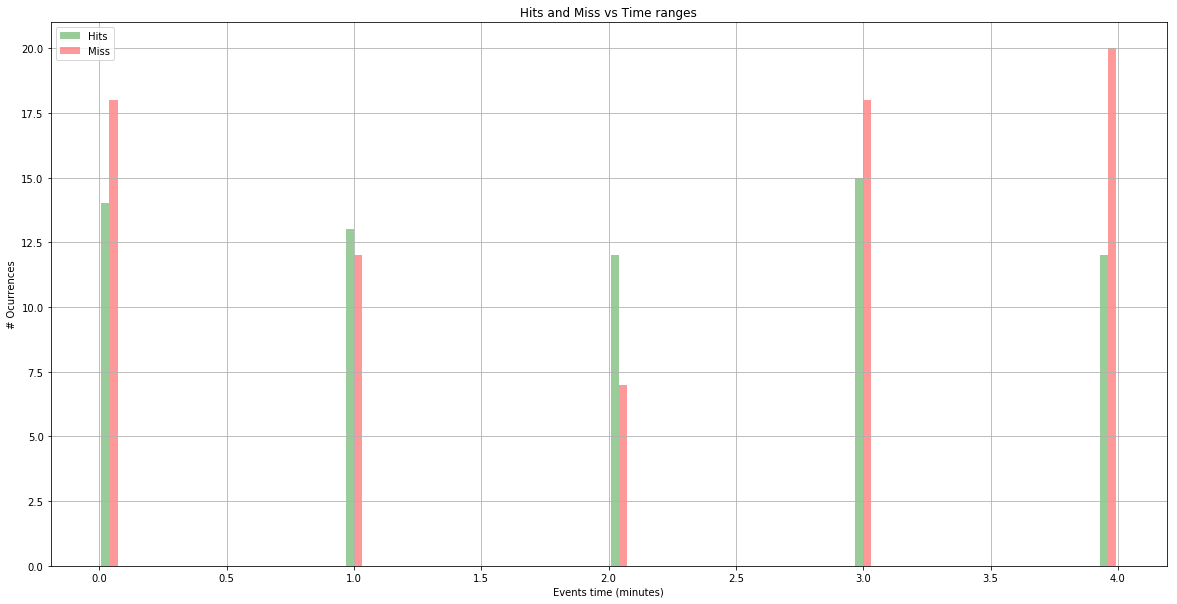

In [5]:

# file path
OUT_FILENAME = str(INFORME_DIR)+"/D2D/D2D_urban_1.out"

# def colums names of pandas dataframes
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return 1
    return 0

# conversion VTime a float
def time_to_min(time):
    h, m, s, ms, r = time.split(':')
    return float(m)

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_min
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

is_hit =  salida['value']==1 

is_miss = salida['value']==0 

salida_hits = salida[is_hit]

salida_miss = salida[is_miss]

plt.figure(figsize=(20,10))

plt.hist([salida_hits['time'],salida_miss['time']], 50, density=False, color=['g', 'r'], alpha=0.40,label=['Hits','Miss'])

plt.xlabel('Events time (minutes)')
plt.ylabel('# Ocurrences')
plt.title('Hits and Miss vs Time ranges')
plt.grid(True)
plt.legend();

### Urban Areas with high device interference 

In [7]:
%%bash -s "$INFORME_DIR"

cd $1/D2D

bin/cd++ -m model/D2D_urban_2.ma \
         -o D2D_urban_2.out \
         -l D2D_urban_2.log \
         -t 00:05:00:00 \
         > debug.txt 

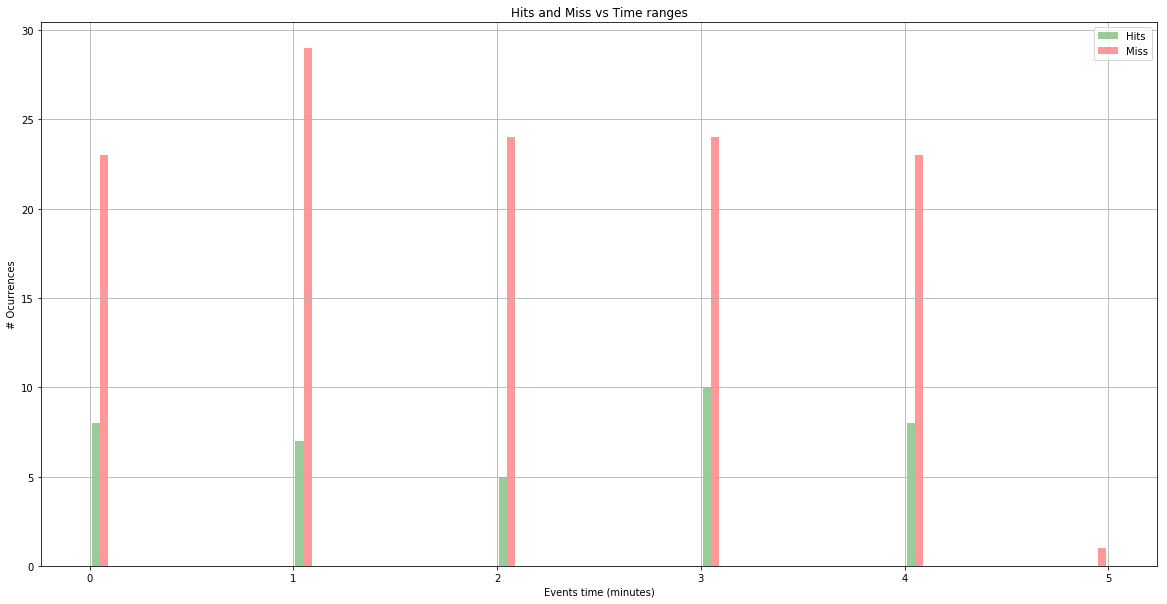

In [8]:

# file path
OUT_FILENAME = str(INFORME_DIR)+"/D2D/D2D_urban_2.out"

# def colums names of pandas dataframes
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return 1
    return 0

# conversion VTime a float
def time_to_min(time):
    h, m, s, ms, r = time.split(':')
    return float(m)

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_min
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

is_hit =  salida['value']==1 

is_miss = salida['value']==0 

salida_hits = salida[is_hit]

salida_miss = salida[is_miss]

plt.figure(figsize=(20,10))

plt.hist([salida_hits['time'],salida_miss['time']], 50, density=False, color=['g', 'r'], alpha=0.40,label=['Hits','Miss'])

plt.xlabel('Events time (minutes)')
plt.ylabel('# Ocurrences')
plt.title('Hits and Miss vs Time ranges')
plt.grid(True)
plt.legend();

### Suburban Areas with low device interference 

In [9]:
%%bash -s "$INFORME_DIR"

cd $1/D2D

bin/cd++ -m model/D2D_suburban_1.ma \
         -o D2D_suburban_1.out \
         -l D2D_suburban_1.log \
         -t 00:05:00:00 \
         > debug.txt 

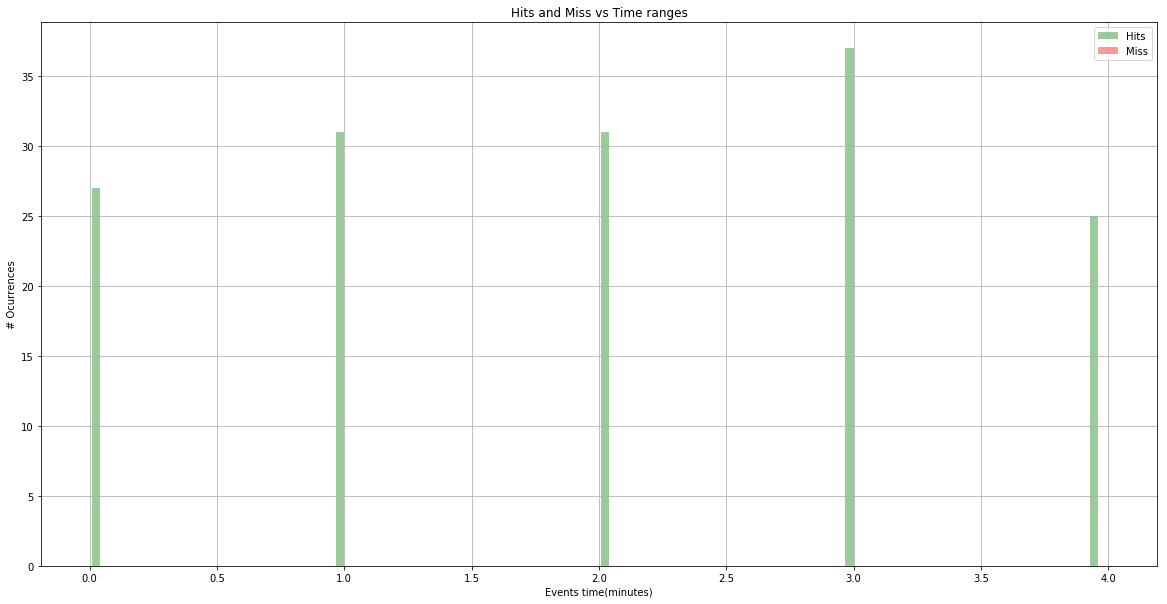

In [10]:
# file path
OUT_FILENAME = str(INFORME_DIR)+"/D2D/D2D_suburban_1.out"

# def colums names of pandas dataframes
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return 1
    return 0

# conversion VTime a float
def time_to_min(time):
    h, m, s, ms, r = time.split(':')
    return float(m)

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_min
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

is_hit =  salida['value']==1 

is_miss = salida['value']==0 

salida_hits = salida[is_hit]

salida_miss = salida[is_miss]

plt.figure(figsize=(20,10))

plt.hist([salida_hits['time'],salida_miss['time']], 50, density=False, color=['g', 'r'], alpha=0.40,label=['Hits','Miss'])


plt.xlabel('Events time(minutes)')
plt.ylabel('# Ocurrences')
plt.title('Hits and Miss vs Time ranges')
plt.grid(True)
plt.legend();


### Suburban Areas with high device interference

In [11]:
%%bash -s "$INFORME_DIR"

cd $1/D2D

bin/cd++ -m model/D2D_suburban_2.ma \
         -o D2D_suburban_2.out \
         -l D2D_suburban_2.log \
         -t 00:05:00:00 \
         > debug.txt

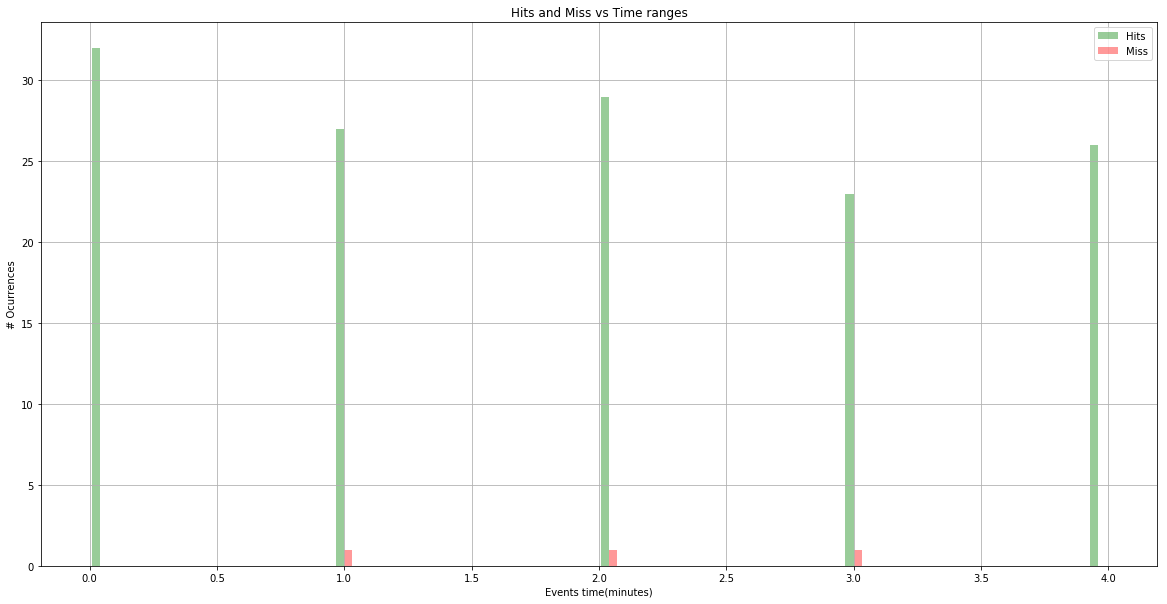

In [12]:
# file path
OUT_FILENAME = str(INFORME_DIR)+"/D2D/D2D_suburban_2.out"

# def colums names of pandas dataframes
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return 1
    return 0

# conversion VTime a float
def time_to_min(time):
    h, m, s, ms, r = time.split(':')
    return float(m)

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_min
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

is_hit =  salida['value']==1 

is_miss = salida['value']==0 

salida_hits = salida[is_hit]

salida_miss = salida[is_miss]

plt.figure(figsize=(20,10))

plt.hist([salida_hits['time'],salida_miss['time']], 50, density=False, color=['g', 'r'], alpha=0.40,label=['Hits','Miss'])

plt.xlabel('Events time(minutes)')
plt.ylabel('# Ocurrences')
plt.title('Hits and Miss vs Time ranges')
plt.grid(True)
plt.legend();

### Analysis of Results

In this preliminary study of the simulator created, a first experimental scenario was used to show its behavior through the number of messages successfully sent vs. the number of messages lost.  It was considered to vary two essential parameters for communication such as the density of obstacles in the channel and interference from other devices.
 
Regarding the density of obstacles, two possible scenarios were used, one called urban, which represents communications in cities and places with a high density of obstacles, and the other called suburban, to represent unpopulated areas.

Interference was controlled through the number of devices that generate their own signals, which are interpreted as interference in the communication of the DUE - Relay - Base Station. This means that the greater the number of nearby devices, the greater the interference.

In both urban and suburban scenarios, it can be observed that interference plays a preponderant role in the quality of communications, since using low densities of interfering devices, it is possible to obtain a greater number of successfully delivered messages.

It is also evident that the density of obstacles has a greater influence on the quality of communications, since for a suburban scenario, in both cases (high or low interference), it turns out to be better for the quality of communication measured by the number of messages delivered.

The consistency of the created simulator can also be validated based on the expected behavior vs. the obtained result, i.e., it is naturally expected that the higher the density of obstacles and the greater the interference, the lower the quality of the communication, and this is evidenced in the results shown.


### Future Work

For the second installment of this work we will create a statistical evaluation environment to measure communication performance using expected packet delivery ratio (EDR) and end-to-end delay (EED) as metrics. Evaluations will be performed based on parametric combinations established by design of experiments techniques, such as the Latin hypercube.

Statistical convergence is expected to be validated based on the central limit theorem and the law of large numbers, which will establish that both EDR and EED obtained will have a normal distribution, and will represent a good poblational estimator.